1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [10]:

from sklearn.datasets import load_breast_cancer

# Load the dataset
myData = load_breast_cancer()

# Display the whole data's description.
print(myData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

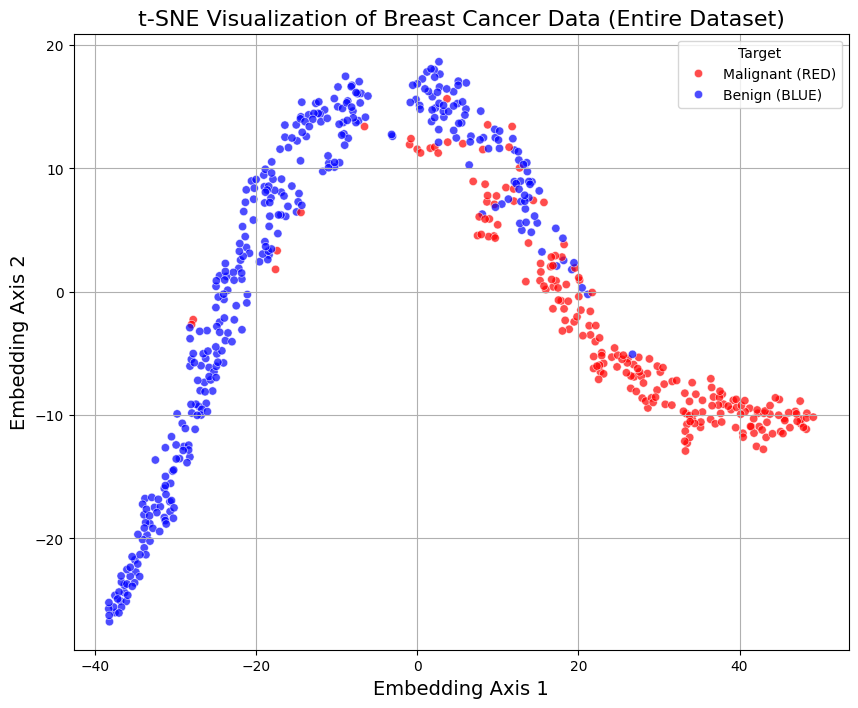

In [11]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

X = myData.data
y = myData.target

# Apply t-SNE with optimized parameters
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
XEmbedded = tsne.fit_transform(X)

# Create a DataFrame for visualization
tsneData = pd.DataFrame(XEmbedded, columns=['Component1', 'Component2'])
tsneData['Target'] = y

# 0 = Malignant (red), 1 = Benign (blue)
customPalette = {0: 'red', 1: 'blue'}

# Plot the t-SNE result using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsneData, x='Component1', y='Component2', hue='Target', palette=customPalette, hue_order=[0, 1], alpha=0.7)
plt.title('t-SNE Visualization of Breast Cancer Data (Entire Dataset)', fontsize=16)
plt.xlabel('Embedding Axis 1', fontsize=14)
plt.ylabel('Embedding Axis 2', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Malignant (RED)', 'Benign (BLUE)']
plt.legend(handles=handles, labels=labels, title='Target')
plt.grid(True)
plt.show()

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature-scaling the dataset before splitting it into training/testing sets.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets: 80% training, 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Verifying whether the split is a success.
print("Training set size:", X_train.shape[0], "Samples")
print("Testing set size:", X_test.shape[0], "Samples")
print("\nClass distribution in TRAINING set:")
print("-->  Benign:", sum(y_train == 1), "| Malignant:", sum(y_train == 0))
print("\nClass distribution in TESTING set:")
print("-->  Benign:", sum(y_test == 1), "| Malignant:", sum(y_test == 0))

Training set size: 455 Samples
Testing set size: 114 Samples

Class distribution in TRAINING set:
-->  Benign: 285 | Malignant: 170

Class distribution in TESTING set:
-->  Benign: 72 | Malignant: 42


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Training phase of DecisionTreeClassifier.
dtcModel = DecisionTreeClassifier(random_state=42)
dtcModel.fit(X_train, y_train)
print("UN-TUNED DecisionTreeClassifier's SCORE = ", dtcModel.score(X_test, y_test))

UN-TUNED DecisionTreeClassifier's SCORE =  0.9122807017543859


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Training phase of RandomForestClassifier.
rfcModel = RandomForestClassifier(random_state=42, n_estimators=100)
rfcModel.fit(X_train, y_train)

print("UN-TUNED RandomForestClassifier's SCORE = ", rfcModel.score(X_test, y_test))

UN-TUNED RandomForestClassifier's SCORE =  0.956140350877193


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [15]:
from sklearn.ensemble import AdaBoostClassifier

abcModel = AdaBoostClassifier(random_state=42, n_estimators=50)
abcModel.fit(X_train, y_train)
print("UN-TUNED AdaBoostClassifier's SCORE = ", abcModel.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


UN-TUNED AdaBoostClassifier's SCORE =  0.956140350877193


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner



Tuning Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

Tuning Random Forest...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 50}

Tuning AdaBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=3, random_state=42), 'learning_rate': 1, 'n_estimators': 200}

--- Evaluating Decision Tree ---

Decision Tree Confusion Matrix:
[[38  4]
 [ 2 70]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



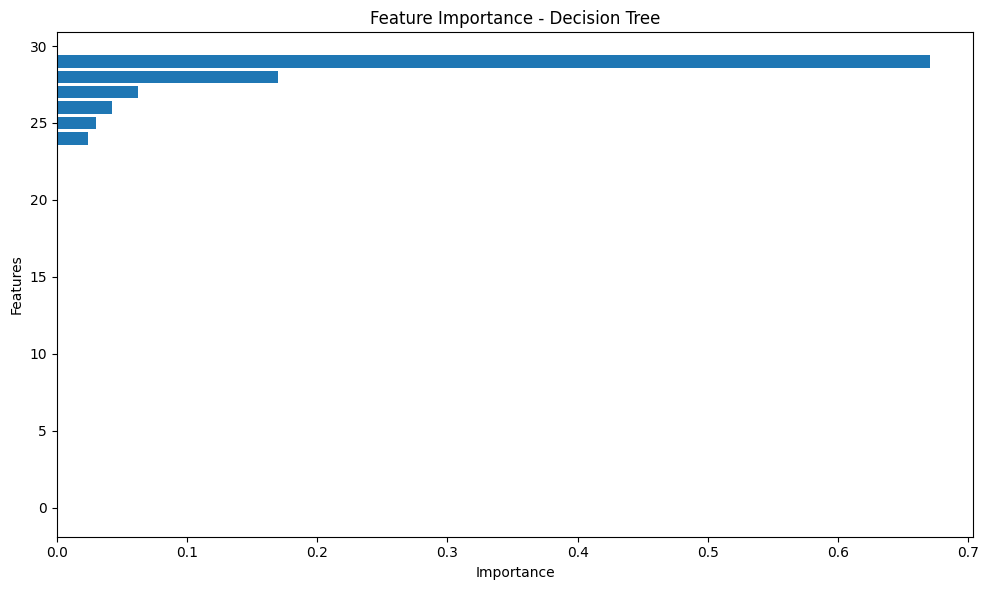


--- Evaluating Random Forest ---

Random Forest Confusion Matrix:
[[39  3]
 [ 3 69]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



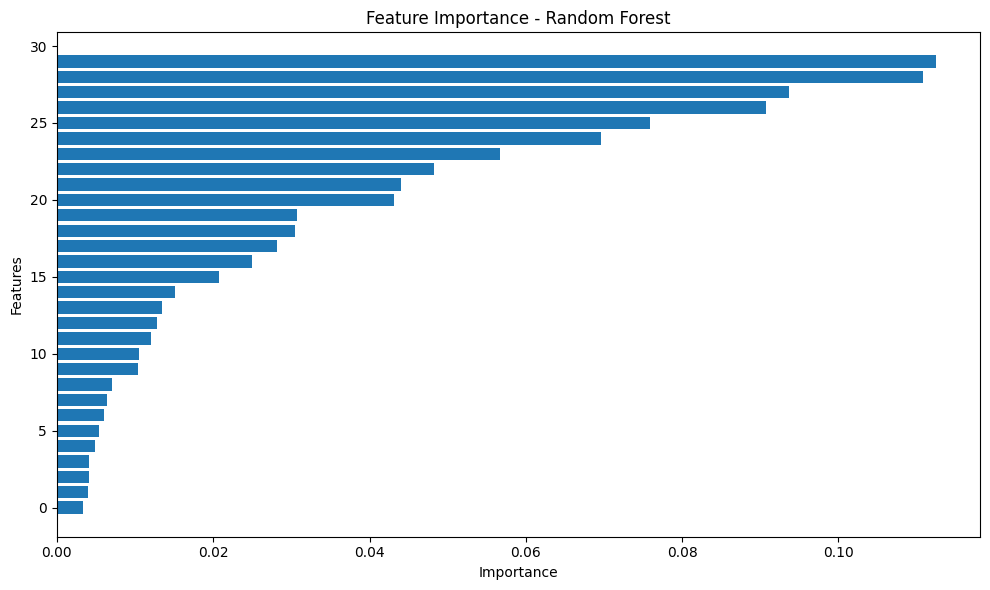


--- Evaluating AdaBoost ---

AdaBoost Confusion Matrix:
[[38  4]
 [ 2 70]]

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



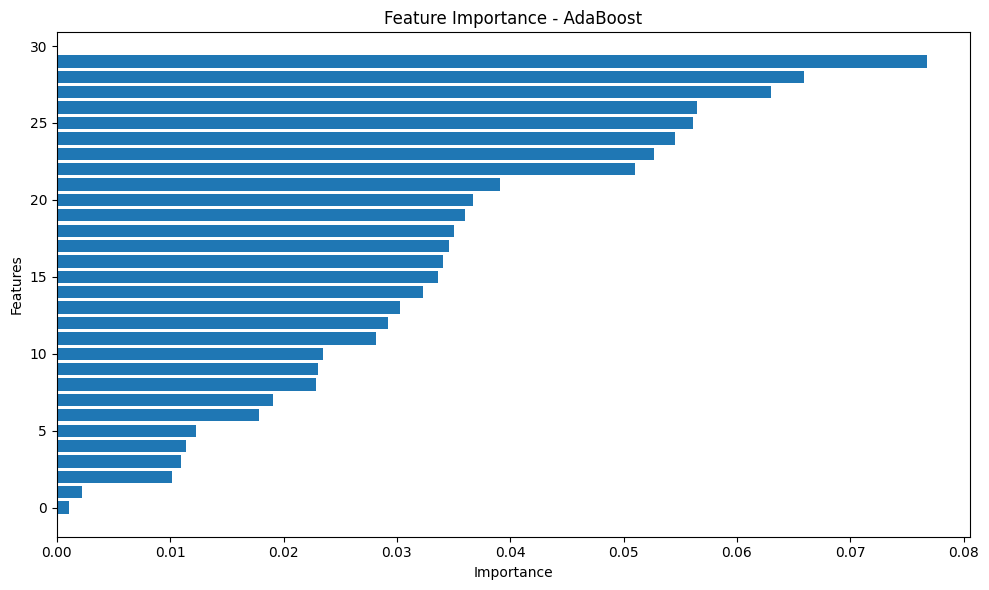


--- Metrics Comparison ---

Decision Tree Metrics:
Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1 Score: 0.9589

Random Forest Metrics:
Accuracy: 0.9474
Precision: 0.9583
Recall: 0.9583
F1 Score: 0.9583

AdaBoost Metrics:
Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1 Score: 0.9589


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Evaluating Voting Classifier ---

Voting Classifier Confusion Matrix:
[[38  4]
 [ 2 70]]

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


--- Final Model Comparison ---

Decision Tree Metrics:
Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1 Score: 0.9589

Random Forest Metrics:
Accuracy: 0.9474
Precision: 0.9583
Recall: 0.9583
F1 Score: 0.9583

AdaBoost Metrics:
Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1 Score: 0.9589

Voting Classifier Metrics:
Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1 Score: 0.9589


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.base import clone

# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Performance metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display Confusion Matrix
    print(f"\n{name} Confusion Matrix:\n{cm}")
    print(f"\n{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Feature Importance (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        feature_imp = model.feature_importances_
        sorted_idx = np.argsort(feature_imp)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), feature_imp[sorted_idx])
        plt.title(f'Feature Importance - {name}')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()

    return metrics

# Define models and parameter grids
models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'class_weight': [None, 'balanced']
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [1, 2, 3]]  # Base estimator tuning
    })
}

# Perform grid search for each model
best_models = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = 'f1'

for name, (model, param_grid) in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        model, param_grid, cv=cv, scoring=scoring, verbose=1, n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best Parameters for {name}: {grid.best_params_}")

# Evaluate all models on the test set
results = {}
for name, model in best_models.items():
    print(f"\n--- Evaluating {name} ---")
    metrics = evaluate_model(name, model, X_test, y_test)
    results[name] = metrics

# Print comparative metrics
print("\n--- Metrics Comparison ---")
for name, metrics in results.items():
    print(f"\n{name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[(name.lower().replace(" ", "_"), clone(model)) for name, model in best_models.items()],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
print("\n--- Evaluating Voting Classifier ---")
voting_metrics = evaluate_model("Voting Classifier", voting_clf, X_test, y_test)

# Final Comparison
print("\n--- Final Model Comparison ---")
for name, metrics in {**results, "Voting Classifier": voting_metrics}.items():
    print(f"\n{name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")